# Random Numbers

Random numbers are useful in computer programs for a variety of purposes, not only games, but for also tasks such as generating data encryption keys, or adding pixel noise to images. In computational physics we use random numbers extensively in simulations. 

Creating completely random sequences on a computer turns out to be actually really quite complicated. The problem is that computer code is 100% predictable, so making anything truly random is impossible. All commonly used _random number generators_ are therefore actually _Pseudo Random Number Generators_ (PRNGs). They start with a _seed_ and from that seed they will create a perfectly predictable, but seemingly random, sequence. One would usually choose something slightly random, like the current time, to select a seed that is not the same each time you run the PRNG.

The PRNG that is available for Python is in the [ _random_ package](https://docs.python.org/3/library/random.html). You can also import [_numpy.random_]() which uses the same algorithms but with a more Numpy aware interface. The RPNG in Python uses a modern version of the [Mersenne Twister algorithm](https://en.wikipedia.org/wiki/Mersenne_Twister), which was created in 1997 to improve random number generation. There exist a [whole long list of other (older and newer) algorithms](https://en.wikipedia.org/wiki/List_of_random_number_generators), but the Mersenne Twister is one of the most widely used ones. 

The underlying mechanism of a PRNG will create a random sequence of bits, which are then converted to a floating point number between 0 and 1 for each call to `random.random()`, in such a way that this distribution is "flat". That means, each interval $[x,x+dx]$ is equally likely to occur, for any choice of $x$ and $dx$. More on distributions below.

Here is an example of generating some random numbers **from a given seed**. Note that the output will be same each time you call this sequence. 


In [1]:
import random
random.seed(123456789)
random.random()

0.6414006161858726

That can be very useful when debugging your code, but it is not good if you want to make sure that you get a difference random sequence each time you call "random()". You can set a different seed automatically by using something like the current time in seconds:

In [2]:
import time
my_seed = int(time.time())
print("I am using for seed: {}".format(my_seed))
random.seed(my_seed)
random.random()

I am using for seed: 1583773089


0.33166950717356114

It can be convenient to generate a whole list of random numbers with one call. The Numpy package contains an interface to _random numbers_ that allows for this. Note that this is a _separate_ implementation of "random", and thus _independent_ of "random" with its own seed, and will generate a different sequence given the same seed as "random". It is probably better to use only one or the other in your Python code. We will switch to the Numpy version now.

In [3]:
import numpy as np
import numpy.random as R
R.seed(my_seed)
R.random(10)

array([0.1882578 , 0.62343015, 0.90178471, 0.87929055, 0.62405678,
       0.92488342, 0.94977975, 0.4056511 , 0.57918999, 0.77554291])

## Mean and Standard Deviation.

When working with statistical data you will often want to know the _mean_ and [_standard deviation_](https://en.wikipedia.org/wiki/Standard_deviation) of that data. 

The *mean* is the same as the *average*, so for an array (list) of data $x_i$ with $N$ numbers, we can compute this as:

$$ \left< x \right> = \frac{1}{N}\sum_{i=0}^N x_i $$

The *standard deviation* is the same as the *square root of the variance*, and we can compute this as:

$$ \sigma_{x}^2 = \frac{1}{N}\sum_{i=0}^N \left(x_i - \left<x\right>\right)^2 = \left<x^2\right> - \left<x\right>^2 $$

There are Numpy methods to compute this in one step on a data set. Below is some code that verifies the formulas above using Numpy calculations.

In [4]:
data = R.random(1000) # 1000 random numbers.
#
# Mean by direct computation:
#
mean0 = 0
for n in data: mean0 += n     # For each element add it to mean0
mean0 = mean0/len(data)       # Normalize by the number of entries in data.
mean1 = np.sum(data)/len(data)
# Preferred: Using Numpy:
mean2 = np.mean(data)
print("Mean: {}  {}  {}".format(mean0,mean1,mean2))  # Note that mean0 suffers from a roundoff error.
#
# Standard deviation by direct computation
#
stdev0 = 0
for n in data: stdev0 += (n - mean0)**2
stdev0 = np.sqrt( stdev0/len(data))
stdev1 = np.sqrt( np.mean( (data - np.mean(data))**2) )
stdev2 = np.sqrt( np.mean(data**2) - np.mean(data)**2 )
# Preferred: Using Numpy directly:
stdev3 = np.std(data)
print("stdev: {} {} {} {}".format(stdev0,stdev1,stdev2,stdev3))

Mean: 0.5108312822142722  0.5108312822142727  0.5108312822142727
stdev: 0.29395257663864605 0.2939525766386461 0.29395257663864616 0.2939525766386461


What we see is that the results are very close, but not _quite_ identical. The reason is the various ways in which minor numerical errors are introduced at each step in a calculation. For the different calculations the errors will add up slightly differently.

Other useful statistical quantities can be the _median_, the number where half the values are larger (smaller) than that value. To compute this, you will first need to sort the data in order and then look at the middle value.

Here is an example:

In [5]:
data_sorted = np.sort(data)
if len(data_sorted)%2 == 0:
    median0 = (data_sorted[ len(data_sorted)//2-1] +data_sorted[ len(data_sorted)//2] )/2.
else:
    median0 = data_sorted[ len(data_sorted)//2 ]
# Use numpy:
median1 = np.median(data)
print("median: {}  {}".format(median0,median1))

median: 0.5196302484557417  0.5196302484557417


## Histograms

To check if the distribution of the random number generator is really "flat", we need to make a _histogram_ of a large sequence of random numbers. (See [histogram](https://en.wikipedia.org/wiki/Histogram) for a detailed explanation of histograms.) We can make histograms using Matplotlib, using the `hist()` method.

Here is an example of a check on the distribution of the `numpy.random.random()` function:

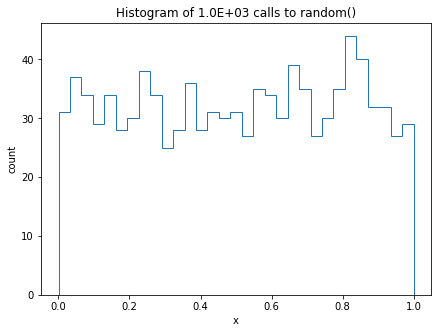

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
N = 1000
dist = R.random(N)
fig, ax = plt.subplots(1,1,figsize=(7,5))
hist_data, bin_edges, patches = ax.hist(dist,bins=31,histtype='step',align='mid')  # Bins is the number of bins you get. 
# histtype='step', align='mid' draws a step graph instead of bars, where the data point is at the center of the step.
ax.set_title("Histogram of {:7.1E} calls to random()".format(N))
ax.set_xlabel('x')
ax.set_ylabel('count')
plt.show()  # Tell matplotlib we actually want to see this figure.

This looks OK if you know what to expect, but you could also say that this does not look "flat". The plot is rather bumpy. Is this what you could expect given the number of random samples we drew?

The way to know that would be to calculate an error for each point in your histogram. For nearly all random samples, the uncertainty on the counts for each bin in the histogram would be the square root of those counts. We can thus calculate the uncertainty for each bin as $\Delta N = \sqrt{N}$.

The data that is returned from the `ax.hist()` call can be used to accomplish this: `hist_data` is an list of length `bins` containing the values of the bins of the histogram, `bin_edges` is a list of length `bins+1`, containing the edges of these bins. To get the centers, we can pair-wise average the bin_edges.

Here is the code:

Text(0, 0.5, 'count')

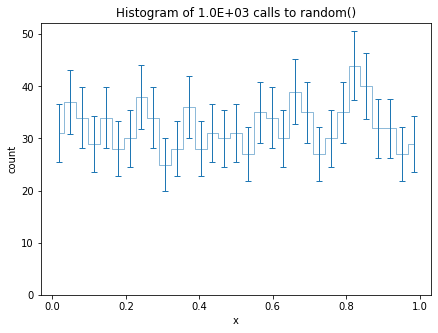

In [7]:
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.  # = list with [ (bin_edges[0]+bin_edges[1])/2. , ...]
hist_errors = np.sqrt(hist_data)
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.errorbar(bin_centers,hist_data,yerr=hist_errors,drawstyle="steps-mid",linestyle='-',linewidth=0.5,elinewidth=1.,capsize=3,marker="")  
# histtype='step', align='mid' draws a step graph instead of bars, where the data point is at the center of the step.
ax.set_ylim(0) # Otherwise the y-axis will not start at zero.
ax.set_title("Histogram of {:7.1E} calls to random()".format(N))
ax.set_xlabel('x')
ax.set_ylabel('count')

You can now see that a horizontal line can be drawn through the data, and that this line will be within 2 $\sigma$ (twice the error bars) of every point. This means the distribution is indeed "flat".

If you increase the number of randoms, your error bars get _larger_, but the counts get _larger faster_, so the relative size of the error bars decreases. Try it.

## Fitting the distribution

We can fit a line through the distribution to show that indeed the shape is what we expect. The general procedure of fitting a function $f(x)$, which has a set of parameters $\{p_i\}$, to a data set is quite complicated. The details are well beyond the scope of this document, so here I will just show you how to use the standard _least squares fitting_ procedures that are available in Scipy.

Note that fitting data can be very tricky for complex data sets, requiring some tricks and many tries. Fitting a straight line, or a quadradit, to some data is much simpler, should be quite robust.

### Simple fit for straight line to data

The parameters for a straight line, $y = b + m x$, can be found by simply taking some clever averages over the dataset. The slope of the line can be found as:

$$ m = \frac{\sum_{i=0}^N (x_i - <x>)(y_i - <y>)}{\sum_{i=0}^N (x_i - <x>)^2} $$

and the intercept can be found as:

$$ b = <y> - m <x> $$


In [8]:
ave_x = np.mean(bin_centers)
ave_y = np.mean(hist_data)
gi=np.where(bin_centers!=ave_x)
m = np.sum((bin_centers[gi] - ave_x)*(hist_data[gi] - ave_y))/np.sum((bin_centers[gi] - ave_x)**2)
b = ave_y - m*ave_x
print("slope = {:6.3f}  intercept = {:6.3f}".format(m,b))

slope =  1.401  intercept = 31.557


### General fit of a function to data: least squares fit.

The easiest package to fit a general curve to data is [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). This function will by default use the least squares optimization to find the best parameters of your function to fit the data set you provide.

So first you need to define a function which you expect will describe the data if the parameters are chosen correctly. You then call the minimization procedure, which adjusts these parameters until the function best describes the data. The function returns the values for these parameters and an estimation of the errors on those parameters.

How do you know how good the fit was? You can compute the "chi-squared test for goodness of fit" ($\chi^2$). This is sometimes formulated a bit differently than here (i.e. in statistics classes), but the ideas are equivalent. The $\chi^2$ can be found from the following formula:

$$ \chi^2 = \sum_{i=0}^N \frac{\left(y_i - f(x_i)\right)^2}{\sigma_i^2} $$

where the $y_i$ is the data for the $x_i$ bin, and $f(x_i)$ is your fit function evaluated for $x_i$, and $\sigma_i$ is the error on the data point $y_i$. 

Since you often want to compare how good a fit is for different functions $f(x_i)$, you need to normalize the $\chi^2$ to the _number of degrees of freedom_, NDF. The NDF is the number of data points in your histogram (not the data that the histogram was made from!) minus the number of parameters in your function. This means that the NDF gets smaller if you use more parameters. To get the normalized $\chi^2$, you divide by the NDF. The result is called the _reduced chi-squared_ or the _chi-squared per degrees of freedom_. 



Here is an example:

Fit to $f(x)= p_0+ p_1 x$
$p_0$ =  31.56 ±   1.6
$p_1$ =   1.40 ±   2.8

Reduced Chi-squared: 0.5966036029098515


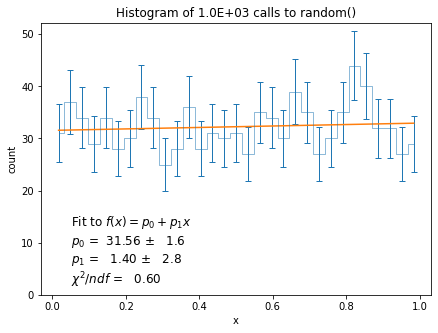

In [9]:
import scipy.optimize as opt
import scipy.stats   as stat
# Define a function for a straight line:
def straight_line(x,a,b):   
    return( a + b*x)

# Define a function for a quadratic line:
def quadratic(x,a,b,c):
    return( a + b*x + c*x*x)

pars, covar = opt.curve_fit(straight_line,bin_centers,hist_data)
#
# pars is the list of values for the parameters of the function.
# covar is the covariant matrix of errors sigma_square[i,j]. The diagonal terms are the square errors on the parameters. 
plot_text=r"Fit to $f(x)= p_0+ p_1 x$"+ '\n'
for i in range(len(pars)):
    plot_text += r"$p_{:1d}$ = {:6.2f} ±{:6.2}".format(i,pars[i],np.sqrt(covar[i,i])) + '\n'

print(plot_text)

#
# A convenient way to call your funtion with the parameters that were returned by the curve_fit is to pass them
# as *pars. This tells Python to unpack the contents of pars and pass them to the function.
# This gives the same result as  straigt_line(x, pars[0], pars[1]), but is more compact.
#   
r_chisq  = np.sum((hist_data - straight_line(bin_centers,*pars))**2/(hist_errors**2))/(len(hist_data)-len(pars))
print("Reduced Chi-squared: {}".format(r_chisq))
plot_text += r"$\chi^2/ndf$ = {:6.2f}".format(r_chisq)
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.errorbar(bin_centers,hist_data,yerr=hist_errors,drawstyle="steps-mid",linestyle='-',linewidth=0.5,elinewidth=1.,capsize=3,marker="")  
# histtype='step', align='mid' draws a step graph instead of bars, where the data point is at the center of the step.
ax.set_ylim(0) # Otherwise the y-axis will not start at zero.
ax.set_title("Histogram of {:7.1E} calls to random()".format(N))
ax.set_xlabel('x')
ax.set_ylabel('count')
ax.text(0.05,2.,plot_text,fontsize=12)
ax.plot(bin_centers,straight_line(bin_centers, *pars))  # Add the curve to our histogram, so we can see how good it was.

We see that the fitting routine found the same values for the slope and intercept as before, but now we also get the error estimate on those parametrs. You can see that the slope is indeed consistent with zero!

If you re-do this fit with a quadratic function instead of a line, does it fit "better"?  Try it!

## Different Distributions

Very often you do not want to use a "flat" or _uniform_ distribution but some other shape. Common non-uniform distributions are the _normal distribution_ which is shaped like a Gaussian curve, the _binomial_ distribution, the _poisson_ distribution, the exponential distribution, ...  There are many! (See: [Common Distribution Functions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/))

Each distribution is described by a Probability Density Function (PDF), which for the normal distribution is shaped like a Gaussian. Some of these distributions are readily available from Numpy.random. For instance, the normal distribution with mean mu and standard deviation sigma is obtained by calling `random.normal(mu,sigma,size)`, or the uniform distribution between two points $[a,b]$ is `random.uniform(a,b)`

Here is the normal distrinution, and the histogram:

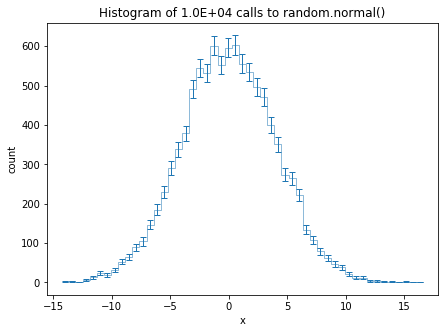

In [10]:
N=10000
norm = R.normal(20,4,N)

# Bins is the number of bins you get. 
hist_data, bin_edges, patches = ax.hist(norm,bins=51,histtype='step',align='mid') 

fig, ax = plt.subplots(1,1,figsize=(7,5))
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.  # = list with [ (bin_edges[0]+bin_edges[1])/2. , ...]
hist_errors = np.sqrt(hist_data)
ax.errorbar(bin_centers,hist_data,yerr=hist_errors,drawstyle="steps-mid",linestyle='-',linewidth=0.5,elinewidth=1.,capsize=3,marker="")  

ax.set_title("Histogram of {:7.1E} calls to random.normal()".format(N))
ax.set_xlabel('x')
ax.set_ylabel('count')
plt.show() 

## Compute your own distribution

Sometimes you need to throw the random numbers in a distribution that is not readily available. This is often the case when you do a Monte Carlo simulation (extensively used in particle physics), and, for instance, you need to throw particles according to a certain cross section. You know the formula for the cross section, but how do you get a random generator that produces that? Stated another way: How can you get a distribution that has a PDF that is some _arbitrary_ function that you define?

There is an article how to do this here: [Randomly Generating Numbers
with an Arbitrary Distribution](http://www.av8n.com/physics/arbitrary-probability.htm)  We will solve this problem entirely numerically, though it is often possible to do parts of it exactly mathematical functions. 

First, you need to make sure the PDF is normalized so that the integral over the region of interest is equal to 1. If it is not, you need to normalize the function so that it _is_ one.  Note that there is the (hopefully obvious) limitations that the function must be larger than zero everywhere. So:

$$ f(x) \le 0 \ \mathrm{and} \ \int_{x_0}^{x_1} f(x) dx = 1 $$

What we now want is the integral of the function from $x_0$ to $x < x_1$:

$$ F(x) = \int_{x_0}^{x} f(x') dx'$$

Since $f(x)\le 0$, we _must_ get $F(x)$ going from 0 to 1 in an ever increasing (never decreasing) fashon. The random number generator is then created from the inverse of $F(x)$, so $F^{-1}(y)$, whith $y$ thrown flat between 0 and 1.

Here are the steps worked out for the PDF distribution for $\frac{2}{\pi}\sin^2(x)$, which is already normalized for the domain $0\le x \le \pi$

Check the normalization:

In [20]:
import scipy.integrate as integrate

def input_function(x):
    return( (2/np.pi)*np.sin(x)**2)

x = np.linspace(0,np.pi,1000) # Create a variable x between 0 and pi.
integral = integrate.trapz(input_function(x),x) 
print(integral)

1.0


If that was _not_ zero, we would just devide our function by the result of that integration.

Now we want the F(x), which (remember the [Basic Calculus](https://github.com/mholtrop/Phys601/blob/master/Notebooks/04_Basic_Calculus.ipynb) notebook!) can be found with `integrate.cumtrapz()`. We plot the result to check.

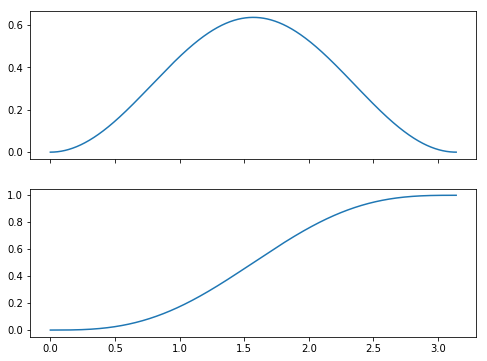

In [21]:
F = integrate.cumtrapz(input_function(x),x,initial=0)   # Add a zero at the front of F. That way it has the same size 
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)
ax1.plot(x,input_function(x))
ax2.plot(x,F)

We now want the inverse of $F$. The easiest way to get that is to _interpolate_ the data points _in reverse_, which we also learned to do in the [Basic Calculus](https://github.com/mholtrop/Phys601/blob/master/Notebooks/04_Basic_Calculus.ipynb) Notebook. We need a new $x$ array that goes only from 0 to 1, i.e. the possible $y$ values of $F$. We do this calculation and then plot the result to check.

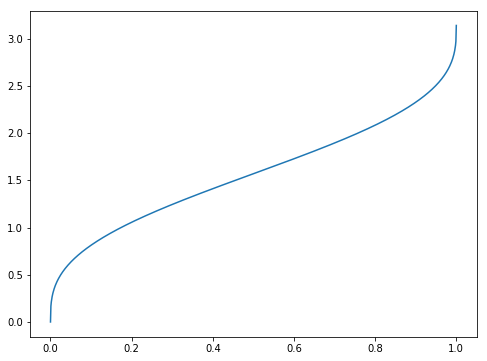

In [22]:
from scipy import interpolate
x_new = np.linspace(0.,1,1000)
Finv = interpolate.interp1d(F,x,kind="cubic")
fig,ax = plt.subplots(1,1,figsize=(8,6),sharex=True)
ax.plot(x_new,Finv(x_new))

Now we can throw the random numbers on the 0 to 1 interval and pass that number to Finv(x), which will then give us the correct distribution. This is done for a large number of points below.

595.3424827743845


<Figure size 432x288 with 0 Axes>

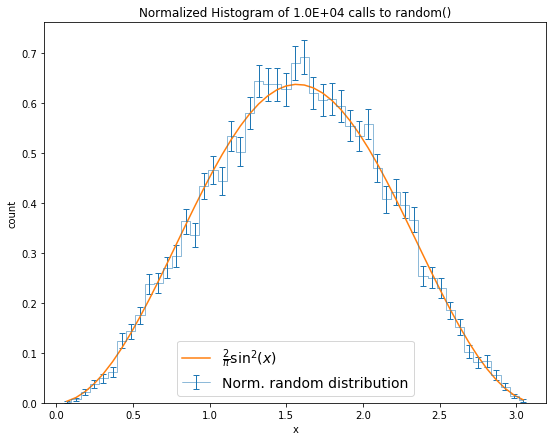

In [23]:
N= 10000
# r_data = np.arccos(np.sqrt(R.uniform(0.,1.,N)))
r_flat = R.uniform(0.,1.,N)
r_data = Finv(r_flat)
hist_data, bin_edges, patches = plt.hist(r_data,bins=51,histtype='step',align='mid')
plt.clf()  # Clear that plot, so it won't show up.
fig, ax = plt.subplots(1,1,figsize=(9,7))
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2.
hist_errors = np.sqrt(hist_data)
normalizer = integrate.trapz(hist_data,bin_centers)  # Get the integral over the domain.
print(normalizer)
hist_data =   hist_data/normalizer                   # Here we normalize by the integral to get a density plot.
hist_errors = hist_errors/normalizer
ax.errorbar(bin_centers,hist_data,yerr=hist_errors,label="Norm. random distribution",
            drawstyle="steps-mid",linestyle='-',linewidth=0.5,elinewidth=1.,capsize=3,marker="")  
# histtype='step', align='mid' draws a step graph instead of bars, where the data point is at the center of the step.
ax.set_ylim(0) # Otherwise the y-axis will not start at zero.
ax.set_title("Normalized Histogram of {:7.1E} calls to random()".format(N))
ax.set_xlabel('x')
ax.set_ylabel('count')
ax.plot(bin_centers,(2/np.pi)*np.sin(bin_centers)**2,label=r'$\frac{2}{\pi}\sin^2(x)$')  
# Add the curve to our histogram, so we can see how good it was.
ax.legend(fontsize=14)

We see that the resulting distibution, when normalized, very closely matches the original function that we started with. That is exactly what we wanted. 

## Your Turn

Try this out on your own. You can pick one of the standard distributions, like the _normal distribution_, or create one that follows a functional form that you are interested in. 

1. Generate a data sample that follows your distribution, with only a moderate number of random throws.
1. Fit the result. 
    1. How well does the data describe the distribution? 
    2. What is the $\chi^2$ for your fit?
1. Now repeat this with the same distribution, but a larger number of random numbers.
    1. What do you observe?
    2. Does this make sense?